## ЛР 1 

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from typing import Tuple

In [301]:
# 4 вариант
M1 = np.array([[0], 
               [0]])
M2 = np.array([[1], 
               [-1]])
M3 = np.array([[-1], 
               [-1]])

B1 = np.array([[0.2, 0.1],
               [0.1, 0.3]])

B2 = np.array([[0.3, 0.1],
               [0.1, 0.3]])

B3 = np.array([[0.3, -0.1],
               [-0.1, 0.2]])

X = 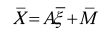
A = 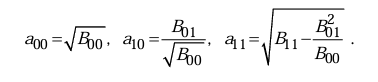

In [302]:
def get_normal_vector(M: np.ndarray, B: np.ndarray, show_print: bool = False) -> np.ndarray:
    A = np.zeros((2, 2))
    A[0, 0] = np.sqrt(B[0, 0])
    A[1, 0] = B[0, 1] / A[0, 0]
    A[1, 1] = np.sqrt(B[1, 1] - np.power(A[1, 0], 2))

    k = 30  
    
    def approx_norm():
        U = np.random.uniform(0, 1, k)
        
        return (np.sum(U) - k/2) / np.sqrt(k/12)

    E = np.array([[approx_norm()], [approx_norm()]])
    
    X = np.dot(A, E) + M

    if show_print:
        print("M: \n", M)
        print("B: \n", B)
        print("A: \n", A)
        print("E (N(0,1)): \n", E)
        print("X (N(M,B)): \n", X)

    return X

X = get_normal_vector(M1, B1, True)
print("X: \n", X)

M: 
 [[0]
 [0]]
B: 
 [[0.2 0.1]
 [0.1 0.3]]
A: 
 [[0.4472136 0.       ]
 [0.2236068 0.5      ]]
E (N(0,1)): 
 [[-0.0009011 ]
 [-0.30924892]]
X (N(M,B)): 
 [[-0.00040298]
 [-0.15482595]]
X: 
 [[-0.00040298]
 [-0.15482595]]


#### Расстояние Махаланобиса: 
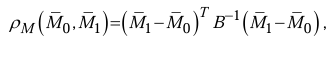
#### Расстояние Бхатачария: 
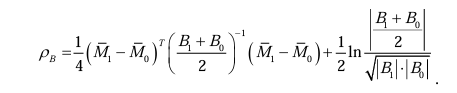

In [303]:
def get_mean(X: np.ndarray, N: int) -> np.ndarray:
    return np.sum(X, axis=0) / N

def get_var(X: np.ndarray, N: int) -> np.ndarray:
    variances = []
    for row in X.transpose():
        mean = sum(row) / N
        var = sum((x - mean) ** 2 for x in row) / (N - 1)
        variances.append(var)

    return np.array(variances)

def get_cov(X: np.ndarray) -> np.ndarray:
    X1 = X.transpose()
    num_rows, num_cols = X1.shape
    
    means = np.array([sum(X1[i]) / num_cols for i in range(num_rows)])
    
    cov_matrix = np.zeros((num_rows, num_rows))
    
    for i in range(num_rows):
        for j in range(num_rows):
            cov = sum((X1[i, k] - means[i]) * (X1[j, k] - means[j]) for k in range(num_cols)) / (num_cols - 1)
            cov_matrix[i, j] = cov

    return np.array(cov_matrix)

# def get_dist_Mahalanobis(M1: np.ndarray, M2: np.ndarray, B: np.ndarray) -> np.ndarray:
#     return np.dot(np.dot((M1 - M2).T, np.linalg.inv(B)), (M1 - M2))

def get_dist_Mahalanobis(M1: np.ndarray, M2: np.ndarray, B1: np.ndarray, B2: np.ndarray | None = None) -> np.ndarray:
    if B2 is None:
        B = B1
    else:
        B = (B1 + B2) / 2

    return np.dot(np.dot((M1 - M2).T, np.linalg.inv(B)), (M1 - M2))

def get_dist_Bhattacharyya(M1: np.ndarray, M2: np.ndarray, B1: np.ndarray, B2: np.ndarray) -> np.ndarray:
    B = (B1 + B2) / 2
    
    return 0.25 * np.dot(np.dot((M1 - M2).T, np.linalg.inv(B)), (M1 - M2)) + \
           0.5 * np.log(np.linalg.det(B) / np.sqrt(np.linalg.det(B1) * np.linalg.det(B2)))


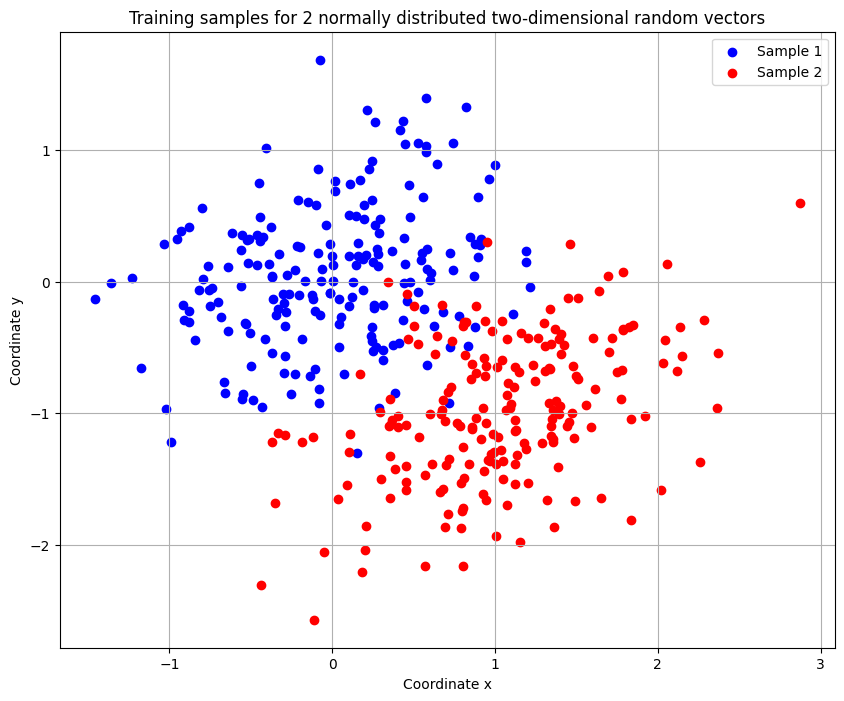

In [304]:
n = 200

X1_samples1 = np.array([get_normal_vector(M1, B2).flatten() for _ in range(n)])
X2_samples1 = np.array([get_normal_vector(M2, B2).flatten() for _ in range(n)])

plt.figure(figsize=(10, 8))
plt.scatter(X1_samples1[:, 0], X1_samples1[:, 1], color="blue", label="Sample 1")
plt.scatter(X2_samples1[:, 0], X2_samples1[:, 1], color="red", label="Sample 2")
plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")
plt.title("Training samples for 2 normally distributed two-dimensional random vectors")
plt.legend()
plt.grid(True)
plt.show()

### Метрики для пары X с одинаковыми дисперсиями 

In [305]:
meanX1_1 = get_mean(X1_samples1, n)
meanX2_1 = get_mean(X2_samples1, n)
varX1_1 = get_var(X1_samples1, n)
varX2_1 = get_var(X2_samples1, n)  
covX1_1 = get_cov(X1_samples1) 
covX2_1 = get_cov(X2_samples1) 

print("Mean X1: ", meanX1_1)
print("Mean X2: ", meanX2_1)
print()

print("Variance X1: \n", varX1_1)
print("Variance X2: \n", varX2_1)
print()

print("Covariance X1: \n", covX1_1)
print("Covariance X2: \n", covX2_1)
print()

print("Dist Mahalanobis X1, X2: ", get_dist_Mahalanobis(meanX1_1, meanX2_1, covX1_1))
print("Dist Bhattacharyya X1, X2: ", get_dist_Bhattacharyya(meanX1_1, meanX2_1, covX1_1, covX2_1))

Mean X1:  [-0.00032048  0.04642226]
Mean X2:  [ 1.02729496 -0.97889035]

Variance X1: 
 [0.30381787 0.29031596]
Variance X2: 
 [0.33506431 0.30486287]

Covariance X1: 
 [[0.30381787 0.07384433]
 [0.07384433 0.29031596]]
Covariance X2: 
 [[0.33506431 0.1341291 ]
 [0.1341291  0.30486287]]

Dist Mahalanobis X1, X2:  9.444979978213905
Dist Bhattacharyya X1, X2:  2.584004925142746


In [306]:
print(B2)
print(B3)

[[0.3 0.1]
 [0.1 0.3]]
[[ 0.3 -0.1]
 [-0.1  0.2]]


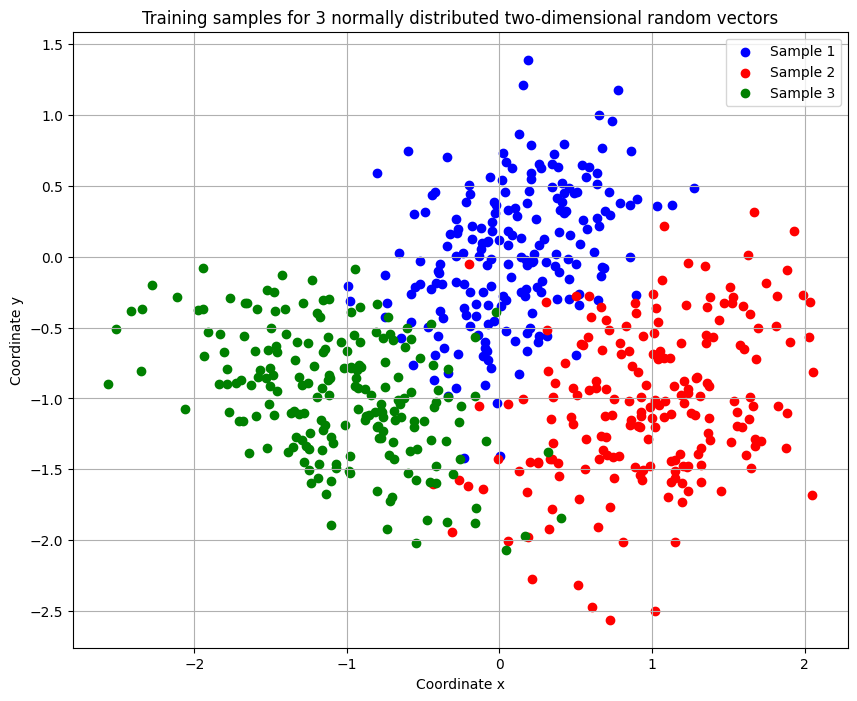

In [307]:
X1_samples2 = np.array([get_normal_vector(M1, B1).flatten() for _ in range(n)])
X2_samples2 = np.array([get_normal_vector(M2, B2).flatten() for _ in range(n)])
X3_samples2 = np.array([get_normal_vector(M3, B3).flatten() for _ in range(n)])

plt.figure(figsize=(10, 8))
plt.scatter(X1_samples2[:, 0], X1_samples2[:, 1], color="blue", label="Sample 1")
plt.scatter(X2_samples2[:, 0], X2_samples2[:, 1], color="red", label="Sample 2")
plt.scatter(X3_samples2[:, 0], X3_samples2[:, 1], color="green", label="Sample 3")
plt.xlabel("Coordinate x")
plt.ylabel("Coordinate y")
plt.title("Training samples for 3 normally distributed two-dimensional random vectors")
plt.legend()
plt.grid(True)
plt.show()

### Метрики для тройки X с разными дисперсиями 

In [308]:
meanX1_2 = get_mean(X1_samples2, n)
meanX2_2 = get_mean(X2_samples2, n)
meanX3_2 = get_mean(X3_samples2, n)
varX1_2 = get_var(X1_samples2, n)
varX2_2 = get_var(X2_samples2, n)
varX3_2 = get_var(X3_samples2, n)
covX1_2 = get_cov(X1_samples2) 
covX2_2 = get_cov(X2_samples2) 
covX3_2 = get_cov(X3_samples2) 

print("Mean X1_2: ", meanX1_2)
print("Mean X2_2: ", meanX2_2)
print("Mean X3_2: ", meanX3_2)
print()

print("Variance X1_2: \n", varX1_2)
print("Variance X2_2: \n", varX2_2)
print("Variance X3_2: \n", varX3_2)
print()

print("Covariance X1_2: \n", covX1_2)
print("Covariance X2_2: \n", covX2_2)
print("Covariance X3_2: \n", covX3_2)
print()

print("Dist Mahalanobis X1_2, X2_2: ", get_dist_Mahalanobis(meanX1_2, meanX2_2, covX1_2, covX2_2))
print("Dist Bhattacharyya X1_2, X2_2: ", get_dist_Bhattacharyya(meanX1_2, meanX2_2, covX1_2, covX2_2))
print()
print("Dist Mahalanobis X1_2, X3_2: ", get_dist_Mahalanobis(meanX1_2, meanX3_2, covX1_2, covX3_2))
print("Dist Bhattacharyya X1_2, X3_2: ", get_dist_Bhattacharyya(meanX1_2, meanX3_2, covX1_2, covX3_2))
print()
print("Dist Mahalanobis X2_2, X3_2: ", get_dist_Mahalanobis(meanX2_2, meanX3_2, covX2_2, covX3_2))
print("Dist Bhattacharyya X2_2, X3_2: ", get_dist_Bhattacharyya(meanX2_2, meanX3_2, covX2_2, covX3_2))

Mean X1_2:  [0.08562678 0.01667033]
Mean X2_2:  [ 0.9876304  -1.03839521]
Mean X3_2:  [-1.05885626 -0.97647248]

Variance X1_2: 
 [0.1776416  0.23886174]
Variance X2_2: 
 [0.2774073  0.29344876]
Variance X3_2: 
 [0.29087768 0.19182232]

Covariance X1_2: 
 [[0.1776416  0.07575708]
 [0.07575708 0.23886174]]
Covariance X2_2: 
 [[0.2774073  0.09612129]
 [0.09612129 0.29344876]]
Covariance X3_2: 
 [[ 0.29087768 -0.10614291]
 [-0.10614291  0.19182232]]

Dist Mahalanobis X1_2, X2_2:  11.912268130375896
Dist Bhattacharyya X1_2, X2_2:  2.9944415632458954

Dist Mahalanobis X1_2, X3_2:  10.906265129600795
Dist Bhattacharyya X1_2, X3_2:  2.835036632874604

Dist Mahalanobis X2_2, X3_2:  14.742214110126941
Dist Bhattacharyya X2_2, X3_2:  3.7832276344640436


## ЛР 2

In [ ]:
def Bayes_Classificator(M1: np.ndarray, M2: np.ndarray, 
                        B: np.ndarray, min: float, max: float, 
                        prob1: float, prob2: float) -> Tuple[np.ndarray, np.ndarray]:
    x = np.linspace(min, max, 200)

    B_inv = np.linalg.inv(B)
    a = np.dot((M1 - M2).T,  B_inv)
    b = -0.5 * np.dot(np.dot((M1 + M2).T, B_inv), (M1 - M2)) + np.log(prob1 / prob2)

    y = (-a[0] * x - b) / a[1]

    return x, y

def Min_Max_Classificator(M1: np.ndarray, M2: np.ndarray, 
                        B: np.ndarray, min: float, max: float, 
                        lambda1: float) -> Tuple[np.ndarray, np.ndarray]:
    x = np.linspace(min, max, 200)

    B_inv = np.linalg.inv(B)
    a = np.dot((M1 - M2).T,  B_inv)
    b = -0.5 * np.dot(np.dot((M1 + M2).T, B_inv), (M1 - M2)) + np.log(lambda1)

    y = (-a[0] * x - b) / a[1]

    return x, y

def Neyman_Pearson_Classificator(M1: np.ndarray, M2: np.ndarray, 
                        B: np.ndarray, min: float, max: float, 
                        p0: float, dist: float) -> Tuple[np.ndarray, np.ndarray]:
    x = np.linspace(min, max, 200)

    lambda_ln = -0.5 * dist + np.sqrt(dist) * norm.ppf(1 - p0)

    B_inv = np.linalg.inv(B)
    a = np.dot((M1 - M2).T,  B_inv)
    b = -0.5 * np.dot(np.dot((M1 + M2).T, B_inv), (M1 - M2)) + lambda_ln

    y = (-a[0] * x - b) / a[1]

    return x, y

def compute_prob_errors(dist: float, prob1: float, prob2: float) -> Tuple[float, float, float]:
    lambda1 = np.log(prob1 / prob2)

    err_I = float(1 - norm.cdf((lambda1 + 0.5 * dist) / np.sqrt(dist)))
    err_II = float(norm.cdf((lambda1 - 0.5 * dist) / np.sqrt(dist)))
    err = prob1 * err_I + prob2 * err_II

    return err_I, err_II, err

In [310]:
meanX1_1 = get_mean(X1_samples1, n)
meanX2_1 = get_mean(X2_samples1, n)
varX1_1 = get_var(X1_samples1, n)
varX2_1 = get_var(X2_samples1, n)  
covX1_1 = get_cov(X1_samples1) 
covX2_1 = get_cov(X2_samples1) 
varX1_1 = get_var(X1_samples1, n)
varX2_1 = get_var(X2_samples2, n)

covX1_X2_1 = ((n-1)*covX1_1 + (n-1)*covX2_1) / (2*n - 2)

In [313]:
dist_Mahalanobis = float(get_dist_Mahalanobis(meanX1_1, meanX2_1, covX1_1))

C:\Users\Stepan\AppData\Local\Temp\ipykernel_10156\2317137957.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_Min_Max, y_Min_Max, 'k-', label='Минимаксный критерий', color="black")
C:\Users\Stepan\AppData\Local\Temp\ipykernel_10156\2317137957.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_Neyman_Pirson, y_Neyman_Pirson, 'k-', label='Критерий Неймана-Пирсона', color="green")
C:\Users\Stepan\AppData\Local\Temp\ipykernel_10156\2317137957.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_Bayes, y_Bayes, 'k-', label='Критерий Байеса', color="red", linestyle='--')
C:\Users\Stepan\AppData\Local\Temp\ip

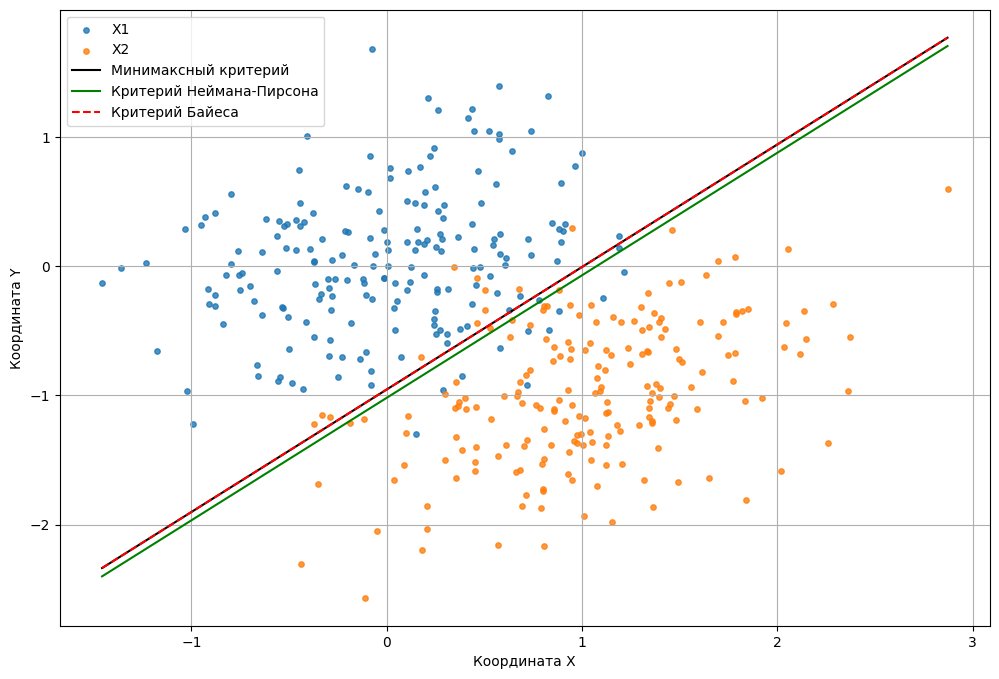

In [334]:
min_X1_X2 = np.min(np.concatenate((X1_samples1[:, 0], X2_samples1[:, 0])))
max_X1_X2 = np.max(np.concatenate((X1_samples1[:, 0], X2_samples1[:, 0])))
prob1 = 0.5
prob2 = 1 - prob1

p0 = 0.05
lambda1 = 1

x_Bayes, y_Bayes = Bayes_Classificator(meanX1_1, meanX2_1, covX1_X2_1, min_X1_X2, max_X1_X2, prob1, prob2)  
x_Min_Max, y_Min_Max = Min_Max_Classificator(meanX1_1, meanX2_1, covX1_X2_1, min_X1_X2, max_X1_X2, lambda1)
x_Neyman_Pirson, y_Neyman_Pirson = Neyman_Pearson_Classificator(meanX1_1, meanX2_1, covX1_X2_1, min_X1_X2, max_X1_X2, p0, dist_Mahalanobis)

plt.figure(figsize=(12,8))
plt.scatter(X1_samples1[:,0], X1_samples1[:,1], s=15, label='X1', alpha=0.8)
plt.scatter(X2_samples1[:,0], X2_samples1[:,1], s=15, label='X2', alpha=0.8)

plt.plot(x_Min_Max, y_Min_Max, 'k-', label='Минимаксный критерий', color="black")
plt.plot(x_Neyman_Pirson, y_Neyman_Pirson, 'k-', label='Критерий Неймана-Пирсона', color="green")
plt.plot(x_Bayes, y_Bayes, 'k-', label='Критерий Байеса', color="red", linestyle='--')
plt.legend()
plt.xlabel('Координата Х')
plt.ylabel('Координата Y')
plt.grid(True)

plt.show()

In [ ]:
def fit_line_from_points(x: np.ndarray, y: np.ndarray) -> tuple:
    a, b = np.polyfit(x, y, deg=1)
    eq = f'y = {a:.6f} * x + {b:.6f}'

    return float(a), float(b), eq


def compute_prob_errors_Bayes(dist: float, prob1: float, prob2: float) -> Tuple[float, float, float]:
    lambda1 = np.log(prob1 / prob2)

    err_I = float(1 - norm.cdf((lambda1 + 0.5 * dist) / np.sqrt(dist)))
    err_II = float(norm.cdf((lambda1 - 0.5 * dist) / np.sqrt(dist)))
    err = prob1 * err_I + prob2 * err_II

    return err_I, err_II, err


def compute_prob_errors_Min_Max(dist: float, lambda1: float ) -> Tuple[float, float]:
    lambda_ln = np.log(lambda1)

    err_I = float(1 - norm.cdf((lambda_ln + 0.5 * dist) / np.sqrt(dist)))
    err_II = float(norm.cdf((lambda_ln - 0.5 * dist) / np.sqrt(dist)))

    return err_I, err_II


def compute_prob_errors_Neyman_Pearson(dist: float, p0: float) -> Tuple[float, float]:
    lambda_ln = -0.5 * dist + np.sqrt(dist) * norm.ppf(1 - p0)

    err_I = float(1 - norm.cdf((lambda_ln + 0.5 * dist) / np.sqrt(dist)))
    err_II = float(norm.cdf((lambda_ln - 0.5 * dist) / np.sqrt(dist)))

    return err_I, err_II


def compute_number_errors(X1: np.ndarray, X2: np.ndarray, 
                          coef_a: float, coef_b: float) -> Tuple[float, float, float, int]:
    n = X1.shape[0]
    
    count_errors_I = 0
    for vector in X1:
        if coef_a * vector[0] + coef_b > vector[1]:
            count_errors_I += 1
    err_I = float(count_errors_I / n)

    count_errors_II = 0
    for vector in X2:
        if coef_a * vector[0] + coef_b < vector[1]:
            count_errors_II += 1
    err_II = float(count_errors_II / n)  

    err = (count_errors_I + count_errors_II) / (2*n) 
    err_eps = np.sqrt((1 - err) / (n*err))

    n = (1 - err) / (err * np.power(0.05, 2))

    return err_I, err_II, err_eps, int(n)

In [316]:
p0_Bayes, p1_Bayes, p_Bayes = compute_prob_errors_Bayes(dist_Mahalanobis, prob1, prob2)
print(f"Вероятность ошибки первого рода: {p0_Bayes:.3f}")
print(f"Вероятность ошибки второго рода: {p1_Bayes:.3f}")
print(f"Общий риск: {p_Bayes:.3f}")

Вероятность ошибки первого рода: 0.062
Вероятность ошибки второго рода: 0.062
Общий риск: 0.062


In [317]:
a, b, eq = fit_line_from_points(x_Bayes, y_Bayes)

p0_Bayes_exp, p1_Bayes_exp, eps_Bayes, n_Bayes = compute_number_errors(X1_samples1, X2_samples1, a, b)
print(f"Экспериментальная вероятность ошибки первого рода: {p0_Bayes_exp:.3f}")
print(f"Экспериментальная вероятность ошибки второго рода: {p1_Bayes_exp:.3f}")
print(f"Относительная погрешность ошибки: {eps_Bayes:.3f}")
print(f"Объем выборки для огрешности не более 0.05: {n_Bayes}")

Экспериментальная вероятность ошибки первого рода: 0.060
Экспериментальная вероятность ошибки второго рода: 0.055
Относительная погрешность ошибки: 0.286
Объем выборки для огрешности не более 0.05: 6556


In [318]:
p0_Min_Max, p1_Min_Max = compute_prob_errors_Min_Max(dist_Mahalanobis, lambda1)
print(f"Вероятность ошибки первого рода: {p0_Min_Max:.3f}")
print(f"Вероятность ошибки второго рода: {p1_Min_Max:.3f}")

Вероятность ошибки первого рода: 0.062
Вероятность ошибки второго рода: 0.062


In [319]:
a, b, eq = fit_line_from_points(x_Min_Max, y_Min_Max)

p0_Min_Max_exp, p1_Min_Max_exp, eps_Min_Max, n_Min_Max = compute_number_errors(X1_samples1, X2_samples1, a, b)
print(f"Экспериментальная вероятность ошибки первого рода: {p0_Min_Max_exp:.3f}")
print(f"Экспериментальная вероятность ошибки второго рода: {p1_Min_Max_exp:.3f}")
print(f"Относительная погрешность ошибки: {eps_Min_Max:.3f}")
print(f"Объем выборки для огрешности не более 0.05: {n_Min_Max}")

Экспериментальная вероятность ошибки первого рода: 0.060
Экспериментальная вероятность ошибки второго рода: 0.055
Относительная погрешность ошибки: 0.286
Объем выборки для огрешности не более 0.05: 6556


In [320]:
p0_Neyman_Pearson, p1_Neyman_Pearson = compute_prob_errors_Neyman_Pearson(dist_Mahalanobis, p0)
print(f"Вероятность ошибки первого рода: {p0_Neyman_Pearson:.3f}")
print(f"Вероятность ошибки второго рода: {p1_Neyman_Pearson:.3f}")

Вероятность ошибки первого рода: 0.050
Вероятность ошибки второго рода: 0.077


In [321]:
a, b, eq = fit_line_from_points(x_Neyman_Pirson, y_Neyman_Pirson)

p0_Neyman_Pearson_exp, p1_Neyman_Pearson_exp, eps_Neyman_Pearson, n_Neyman_Pirson = compute_number_errors(X1_samples1, X2_samples2, a, b)
print(f"Экспериментальная вероятность ошибки первого рода: {p0_Neyman_Pearson_exp:.3f}")
print(f"Экспериментальная вероятность ошибки второго рода: {p1_Neyman_Pearson_exp:.3f}")
print(f"Относительная погрешность ошибки: {eps_Neyman_Pearson:.3f}")
print(f"Объем выборки для огрешности не более 0.05: {n_Neyman_Pirson}")

Экспериментальная вероятность ошибки первого рода: 0.050
Экспериментальная вероятность ошибки второго рода: 0.045
Относительная погрешность ошибки: 0.317
Объем выборки для огрешности не более 0.05: 8021


In [322]:
def get_row_for_2_classes_for_x(M1, M2, B1, B2, x):
    A = 0.5 * (np.linalg.inv(B2) - np.linalg.inv(B1))
    
    b = np.dot(np.transpose(M1), np.linalg.inv(B1)) - np.dot(np.transpose(M2), np.linalg.inv(B2))
    c = (np.dot(np.dot(0.5 * M2.transpose(), np.linalg.inv(B2)), M2) \
         + np.dot(np.dot(-0.5 * M1.transpose(), np.linalg.inv(B1)), M1)
         + 0.5 * np.log(np.linalg.det(B2) / np.linalg.det(B1)))
    
    coeff_y = (A[1][0] * x + A[0][1] * x + b[0][1]) / A[1][1]
    coeff_c = (A[0][0] * x * x + b[0][0] * x + c[0][0]) / A[1][1]

    D = np.power(coeff_y, 2) - 4 * 1 * coeff_c

    y1 = (- coeff_y[D >= 0] + np.sqrt(D[D >= 0])) / 2
    y2 = (- coeff_y[D >= 0] - np.sqrt(D[D >= 0])) / 2

    return x[D > 0], y1, y2

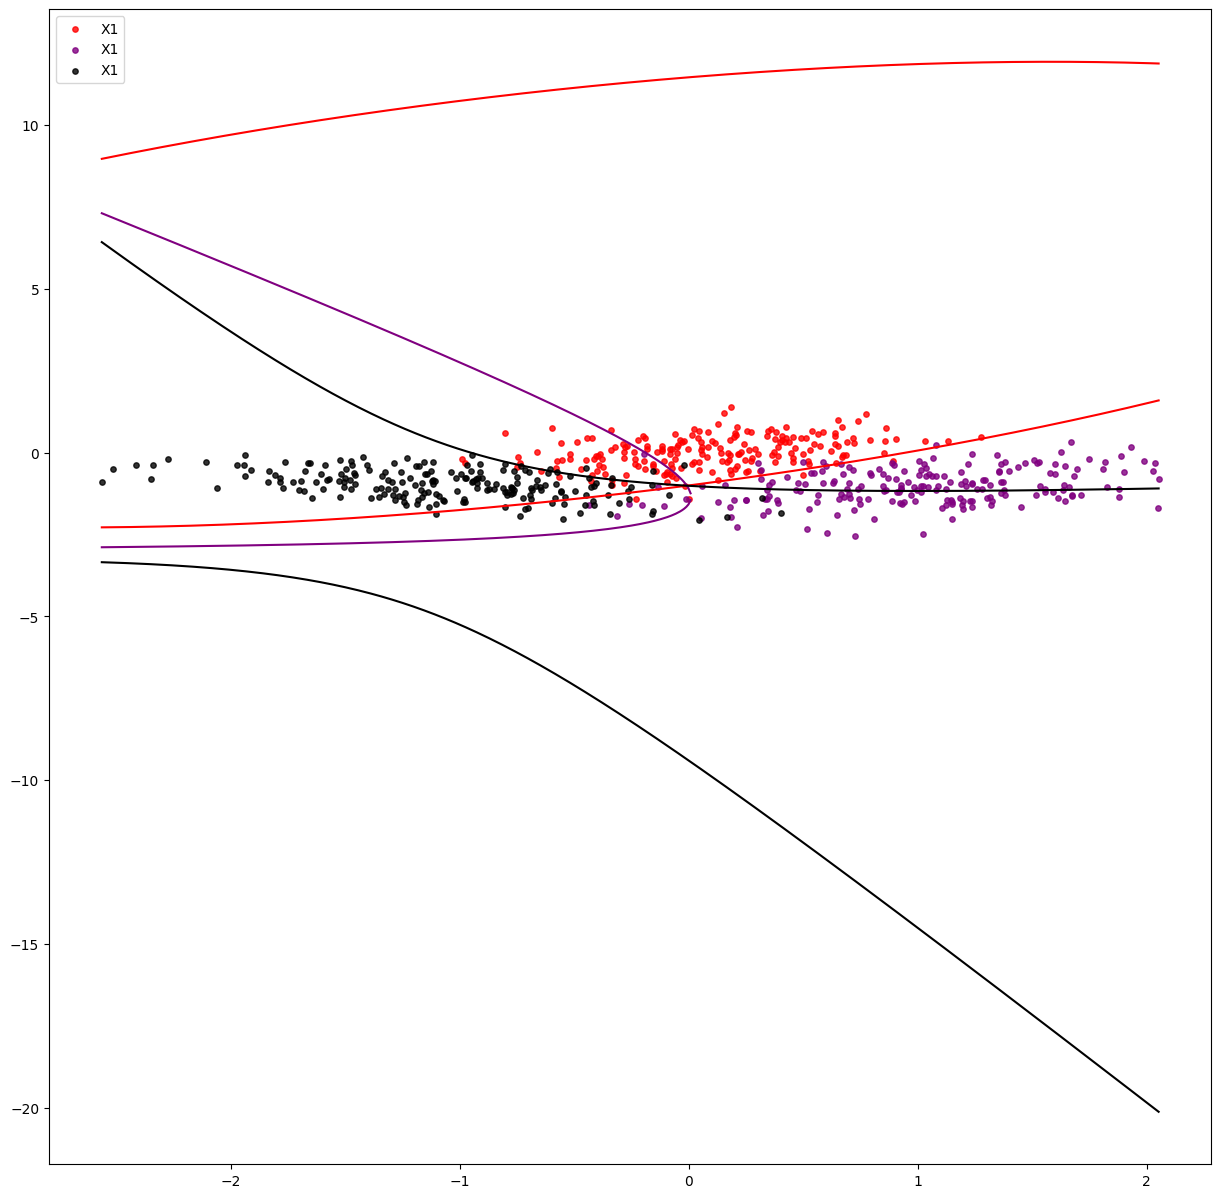

In [323]:
min_X1_X2 = np.min(np.concatenate((X1_samples2[:, 0], X2_samples2[:, 0])))
max_X1_X2 = np.max(np.concatenate((X1_samples2[:, 0], X2_samples2[:, 0])))

min_X2_X3 = np.min(np.concatenate((X2_samples2[:, 0], X3_samples2[:, 0])))
max_X2_X3 = np.max(np.concatenate((X2_samples2[:, 0], X3_samples2[:, 0])))

min_X1_X3 = np.min(np.concatenate((X1_samples2[:, 0], X3_samples2[:, 0])))
max_X1_X3 = np.max(np.concatenate((X1_samples2[:, 0], X3_samples2[:, 0])))

meanX1_2 = get_mean(X1_samples2, n)
meanX2_2 = get_mean(X2_samples2, n)
meanX3_2 = get_mean(X3_samples2, n)

meanX1_2_T = meanX1_2.reshape(-1, 1)
meanX2_2_T = meanX2_2.reshape(-1, 1)
meanX3_2_T = meanX3_2.reshape(-1, 1)

covX1_2 = get_cov(X1_samples2) 
covX2_2 = get_cov(X2_samples2) 
covX3_2 = get_cov(X3_samples2) 

min1 = np.min([min_X1_X2, min_X2_X3, min_X1_X3])
max1 = np.max([max_X1_X2, max_X2_X3, max_X1_X3])

x1 = np.linspace(min1, max1, 500)
x1, y1, y12 = get_row_for_2_classes_for_x(meanX1_2_T, meanX2_2_T, covX1_2, covX2_2, x1)

x2 = np.linspace(min1, max1, 500)
x2, y21, y22 = get_row_for_2_classes_for_x(meanX2_2_T, meanX3_2_T, covX2_2, covX3_2, x2)

x3 = np.linspace(min1, max1, 500)
x3, y31, y32 = get_row_for_2_classes_for_x(meanX1_2_T, meanX3_2_T, covX1_2, covX3_2, x3)

plt.figure(figsize=(15, 15))

plt.scatter(X1_samples2[:,0], X1_samples2[:,1], s=15, label='X1', alpha=0.8, color="red")
plt.scatter(X2_samples2[:,0], X2_samples2[:,1], s=15, label='X1', alpha=0.8, color="purple")
plt.scatter(X3_samples2[:,0], X3_samples2[:,1], s=15, label='X1', alpha=0.8, color="black")

plt.plot(x1, y1, color='red')
plt.plot(x1, y12, color='red')
plt.plot(x2, y21, color='purple')
plt.plot(x2, y22, color='purple')
plt.plot(x3, y31, color='black')
plt.plot(x3, y32, color='black')
plt.legend(loc="upper left")

plt.show()

In [324]:
# def quadratic_discriminant_boundary(x, M_l, M_j, B_l, B_j, P_l, P_j):
#     x = np.array(x).reshape(-1, 1)
#     M_l = np.array(M_l).reshape(-1, 1)
#     M_j = np.array(M_j).reshape(-1, 1)
#     B_l = np.array(B_l)
#     B_j = np.array(B_j)

#     B_l_inv = np.linalg.inv(B_l)
#     B_j_inv = np.linalg.inv(B_j)

#     quadratic_term = 0.5 * x.T @ (B_j_inv - B_l_inv) @ x

#     linear_term = (M_l.T @ B_l_inv - M_j.T @ B_j_inv) @ x

#     constant_term = (0.5 * M_j.T @ B_j_inv @ M_j -
#                      0.5 * M_l.T @ B_l_inv @ M_l +
#                      0.5 * np.log(np.linalg.det(B_j) / np.linalg.det(B_l)) +
#                      np.log(P_l / P_j))

#     d_lj = quadratic_term + linear_term + constant_term

#     return d_lj.item()

# def build_borders(M_arr, B_arr, P_arr, X1, X2, tolerance=0.01):
#     border_map = np.zeros_like(X1, dtype=int)
#     for i in range(X1.shape[0]):
#         for j in range(X1.shape[1]):
#             x_point = np.array([X1[i, j], X2[i, j]])
#             for l in range(len(M_arr)):
#                 for k in range(len(M_arr)):
#                     if l != k:
#                         d_lk = quadratic_discriminant_boundary(x_point, M_arr[l], M_arr[k],
#                                                                B_arr[l], B_arr[k], P_arr[l], P_arr[k])
#                         if -tolerance <= d_lk <= tolerance:
#                             border_map[i, j] = 1
#                             break
#                 if border_map[i, j] == 1:
#                     break
                
#     return border_map

In [325]:
# n = 1000

# X1_samples2 = np.array([get_normal_vector(M1, B1).flatten() for _ in range(n)])
# X2_samples2 = np.array([get_normal_vector(M2, B2).flatten() for _ in range(n)])
# X3_samples2 = np.array([get_normal_vector(M3, B3).flatten() for _ in range(n)])

# meanX1_2 = get_mean(X1_samples2, n)
# meanX2_2 = get_mean(X2_samples2, n)
# meanX3_2 = get_mean(X3_samples2, n)

# covX1_2 = get_cov(X1_samples2) 
# covX2_2 = get_cov(X2_samples2) 
# covX3_2 = get_cov(X3_samples2) 

In [326]:
# M_arr = [meanX1_2, meanX2_2, meanX3_2]
# B_arr = [covX1_2, covX2_2, covX3_2]

# P_arr = [1/3, 1/3, 1/3]

# x1_range = np.linspace(np.min(np.array([X1_samples2[:, 0], X2_samples2[:, 0], X3_samples2[:, 0]])), np.max(np.array([X1_samples2[:, 0], X2_samples2[:, 0], X3_samples2[:, 0]])), 300)
# x2_range = np.linspace(np.min(np.array([X1_samples2[:, 1], X2_samples2[:, 1], X3_samples2[:, 1]])), np.max(np.array([X1_samples2[:, 1], X2_samples2[:, 1], X3_samples2[:, 1]])), 300)
# X1, X2 = np.meshgrid(x1_range, x2_range)

# borders = build_borders(M_arr, B_arr, P_arr, X1, X2)

# plt.figure(figsize=(15, 15))

# plt.contour(X1, X2, borders, levels=[0.5], colors='black',marker='--', linewidths=5)

# plt.scatter(X1_samples2[:, 0], X1_samples2[:, 1], c='red', marker='x')
# plt.scatter(X2_samples2[:, 0], X2_samples2[:, 1], c='blue', marker='x')
# plt.scatter(X3_samples2[:, 0], X3_samples2[:, 1], c='purple', marker='x')